# Filters
They are a single application applied to the entire image, and they serve various purposes.
They are usually needed in order to highlight a feature in the image.

Essentially, a filter is a matrix, called **kernel** that is applied to every single pixel in the image.  
A different value of the **stride** can make it apply on a fraction of the pixels.

In [49]:
import cv2
import numpy as np

img = cv2.imread("samples/tree.png")
#cv2.imshow("Original", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show(*images):
    for i in images:
        image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()


It is strongly suggested to use *odd-sized* (square) kernels, because they have a well - defined "center".

In [51]:
kernel = np.array([
    [1, 0, 1],
    [1, 0, 1],
    [1, 0, 1]
], np.float32)
#Applying kernel
filtered = cv2.filter2D(img, -1, kernel)
#filter2D is the method for applying this kind of transformations.
#the second parameter is the number of channels we want in the output image:
#-1 sets it to the number of channels of the original image
#This is because if we want to apply the kernel to be applied to every channel,
#It must be specified.

cv2.imshow("Filtered", filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Blur

It is useful to *denoise* an image, since it averages the values accross pixels.

In [52]:
blurred = cv2.blur(img, (10, 10), None)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

The second parameter of `blur` is the dimension of the kernel. The bigger the kernel, the more blurred the image will be.

## Gaussian blur

It assumes a gaussian distribution of the noise, and the kernel is arranged accordingly.

In [53]:
gaussian_blurred = cv2.GaussianBlur(img, (3, 3), 1)
cv2.imshow("Blurred", gaussian_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

`sigmaX` and `sigmaY` set the standard deviation of the noise (kernel).  
Setting a single value is giving the same value to both parameters.

## Median blur

The so-called *salt and pepper noise* is a kind of noise that can be removed through this filter.  
It is made up of completely white and black pixels.

In [54]:
saltpepper = cv2.imread("samples/saltpepper.jpeg")
median_blur = cv2.medianBlur(saltpepper, 5, None)
cv2.imshow("Blurred", median_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In this case, there is a single value in the `medianBlur` method since the kernel **must** be square.

## Bilateral filter

This keeps the edges sharp while still applying some noise reduction inside shapes.

In [55]:
bilateraled = cv2.bilateralFilter(img, 9, 75, 75)
cv2.imshow("Blurred", bilateraled)
cv2.waitKey(0)
cv2.destroyAllWindows()

Parameters???

# Sharpening

## Sharpen mask

It sums the original with a blurred version in order to sharpen the edges.

In [56]:
img = cv2.imread("samples/tiger.jpg")
blurred = cv2.GaussianBlur(img, (7, 7), 10)
sharped_img = cv2.addWeighted(img, 0.7, blurred, 0.3, 0)
cv2.imshow("Sharpen mask", sharped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

`addWeighted` performs a weighted mean of the two images. The last parameter performs some color correction.

## Sharpen kernel

It just applies a well-known kernel to sharpen it.

In [57]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], np.float32)

sharpened = cv2.filter2D(img, -1, kernel)
cv2.imshow("Kernel sharpening", sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Derivative - based filters

## Sobel operator

Contours can be interpreted as sharp changes, and if we treat pixel as functions, they can be detected via derivatives. There are 2 derivatives (one for the x - axis, and one for the y - axis). To do it, it is sufficient to transpose the kernel.  
Once the partial derivatives are calculated, they can be combined into a single gradient.  
Since every pixel ranges in $[0, 255]$, they must also be normalized.

In [58]:
#First of all, let's convert the image to greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

der_x = cv2.Sobel(img_gray, -1, 1, 0)
der_y = cv2.Sobel(img_gray, -1, 0, 1)

scaled_x = cv2.convertScaleAbs(der_x)
scaled_y = cv2.convertScaleAbs(der_y)
'''
cv2.imshow("Scaled-x", scaled_x)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Scaled-y", scaled_y)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

out = cv2.addWeighted(scaled_x, 0.5, scaled_y, 0.5, 0)
cv2.imshow("Total", out)
cv2.waitKey(0)
cv2.destroyAllWindows()


The last two arguments are booleans expressing which derivative we are taking. They can be easily combined with a weighted average.

## Laplacian filter

It applies twice the Sobel operator, thus providing a second-derivative overview of the "zero" points.  
Consequently, it also contains all the borders extracted by the Sobel operator.

In [59]:
der = cv2.Laplacian(img_gray, -1, (3, 3))

cv2.imshow("Total", der)
cv2.waitKey(0)
cv2.destroyAllWindows()


# A cartoonized filter

In [60]:
import cv2
import numpy as np
img = cv2.imread("samples/tiger.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#apply a light blur for cleaning the image
img_gray = cv2.medianBlur(img_gray, 5)

#extract the contours
contours = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=5) #this parameter creates an 8-bit unsigned image
# so it takes a value of grey between 0 and 255
#applying a threshold so we can take only strong (true) edges
ret, thresholded = cv2.threshold(contours, 70, 255, cv2.THRESH_BINARY_INV)

#the last parameter specifies the type of colorscheme used in this image
#THRESH_BINARY_INV has black background and white contours

#using the bilateral filter with high values to get the colours:
colours = cv2.bilateralFilter(img, 10, 250, 250)
#converting the gray edges image into a 3-channel image
edges = cv2.cvtColor(thresholded, code = cv2.COLOR_GRAY2BGR)

#bitwise AND for merging edges and colours
out = cv2.bitwise_and(colours, edges)
cv2.imshow("Cartoonized img", out)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [61]:
#Live cartoon implementation

def live_cartoon():
    cap = cv2.VideoCapture(0, )   #0 for frontal webcam

    while True:
        ret, img = cap.read()  #returns boolean if we were able to get frame from stream and frame itself
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #apply a light (doing this cause of the noise)
        img_gray = cv2.medianBlur(img_gray, 5)
        
        #use laplacian filter to extract conotur
        edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize = 5)  
        
        #maybe dont need all edges found with lapacian. Threshold the edges to get only good edges
        ret, thresholded = cv2.threshold(edges, 70, 255, cv2.THRESH_BINARY_INV)  
        
        #use the bilateral filter wigh high values for getting the color (?)
        color_img = cv2.bilateralFilter(img, 10, 250, 250)
        
        #put together color and sketch
        skt = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)  
        
        #lets do the bitwise and for merging sketch and color
        output = cv2.bitwise_and(color_img, skt)    
        
        cv2.imshow("OUT", output)
        k = cv2.waitKey(10)   
        if k == ord("q"):
            break

# Bitwise operations

## Masks

Masks are tensors of 0s and 1s representing boolean statements about other tensors.

In [62]:
x = np.uint8([250])
y = np.uint8([50])

result_opencv = cv2.add(x, y)
result_np = x + y

print("OpenCV: {}".format(result_opencv))
print("Numpy: {}".format(result_np))

OpenCV: [[300.]
 [  0.]
 [  0.]
 [  0.]]
Numpy: [44]


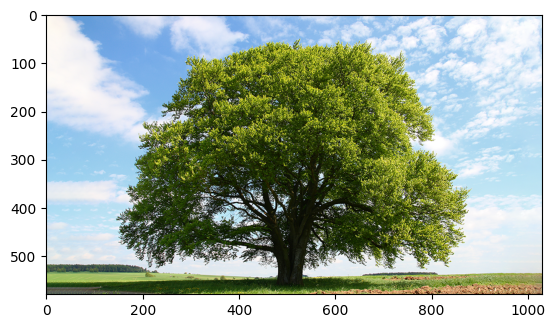

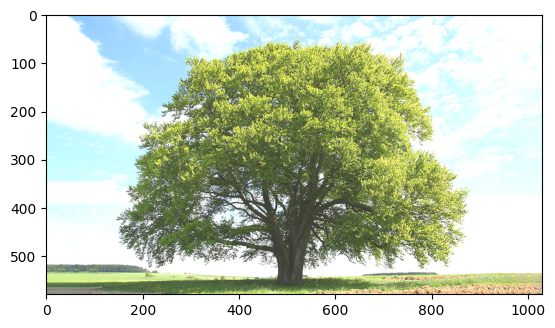

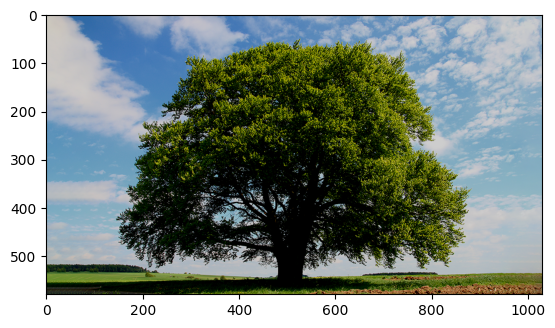

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = cv2.imread('samples/tree.png')

#create a new image with the same size as the original
M = np.full(img.shape, 50, dtype=np.uint8)

#add the two images
added_img = cv2.add(img, M)
subtracted_img = cv2.subtract(img, M)

show(img, added_img, subtracted_img)

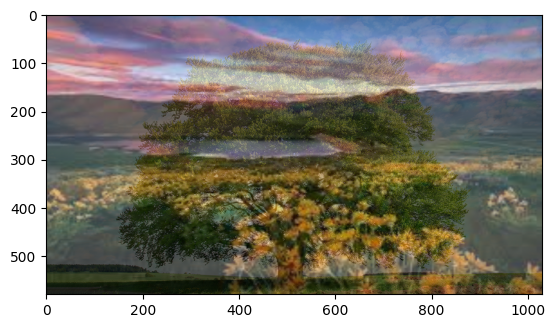

In [64]:
#Blending together 2 images

img1 = cv2.imread('samples/tree.png')
img2 = cv2.imread('samples/landscape.jpeg')

img2_r = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
added_img = cv2.addWeighted(img1, 0.3, img2_r, 0.7, 0)
show(added_img)

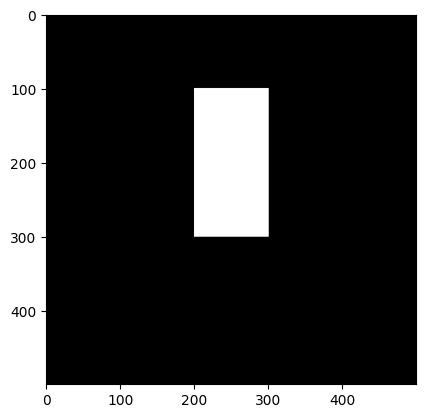

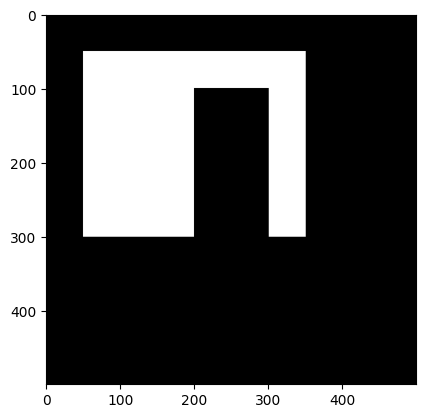

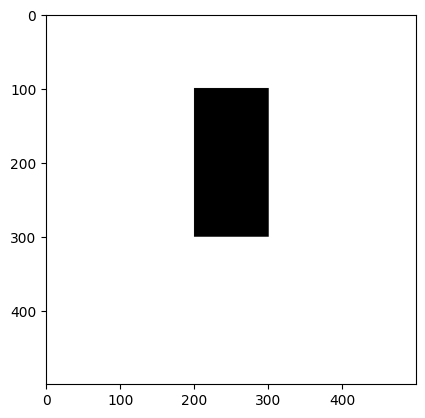

In [67]:
#Pure masks

img1 = np.zeros((500, 500), np.uint8)
img2 = np.zeros((500, 500), np.uint8)

cv2.rectangle(img1, (200, 100), (300, 300), (255, 255, 255), -1)
cv2.rectangle(img2, (50, 50), (350,300), (255, 255, 255), -1)

result = cv2.bitwise_and(img1, img2)
result_xor = cv2.bitwise_xor(img1, img2)
result_not = cv2.bitwise_not(img1)

show(result, result_xor, result_not)

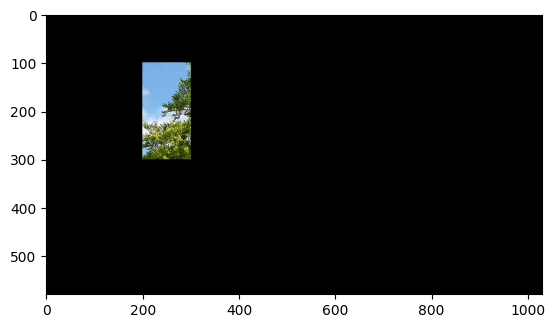

In [66]:
#Applying masks
img = cv2.imread("samples/tree.png")
mask = np.zeros(img.shape, dtype = "uint8")

cv2.rectangle(mask, (200,100), (300,300), (255,255,255), -1)

result = cv2.bitwise_and(img, mask)
#every info that in the input image isnt black and goes inside white rectangle is selected the rest is extracted

show(result)